In [148]:
import json
import re
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
sns.set(rc={"figure.figsize":(16, 2)})

In [2]:
def getCommits():
    with open('../linux-commits-2023-11-12.json') as f:
        for commit in f:
            yield json.loads(commit)

In [3]:
all_commits_synthesized = []
for commit in getCommits():
    lines_changed = 0
    for file in commit['data']['files']:
        if 'added' in file and file['added'] != "-":
            lines_changed += int(file['added']) + int(file['removed'])
    synthesized_commit = {
        'date': commit['data']['CommitDate'],
        'author': commit['data']['Author'],
        'commit_size': lines_changed,
        'number_of_files': len(commit['data']['files']),
    }
    all_commits_synthesized.append(synthesized_commit)

In [4]:
df = pd.DataFrame(all_commits_synthesized)
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y %z', utc=True)

## Basic info

In [5]:
print("Number of commits",len(all_commits_synthesized))
print("Number of committers", len(df['author'].unique().tolist()))
print("First commit date",all_commits_synthesized[0]['date'])
print("Last commit date",all_commits_synthesized[-1]['date'])

Number of commits 1233421
Number of committers 35856
First commit date Sat Apr 16 15:20:36 2005 -0700
Last commit date Sat Nov 11 17:17:22 2023 -0800


## Number of commits per year

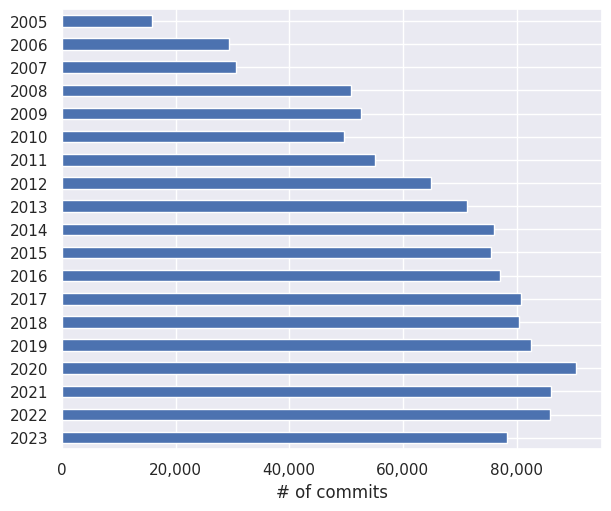

In [179]:
fig, axs = plt.subplots(figsize=(6, 5), layout="constrained")
df.groupby(df["date"].dt.year)['date'].count().plot.barh(ax=axs).invert_yaxis()
plt.xlabel("# of commits") 
plt.ylabel("")
axs.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('commitsPerYear.pdf');

## Number of lines of code touched per year

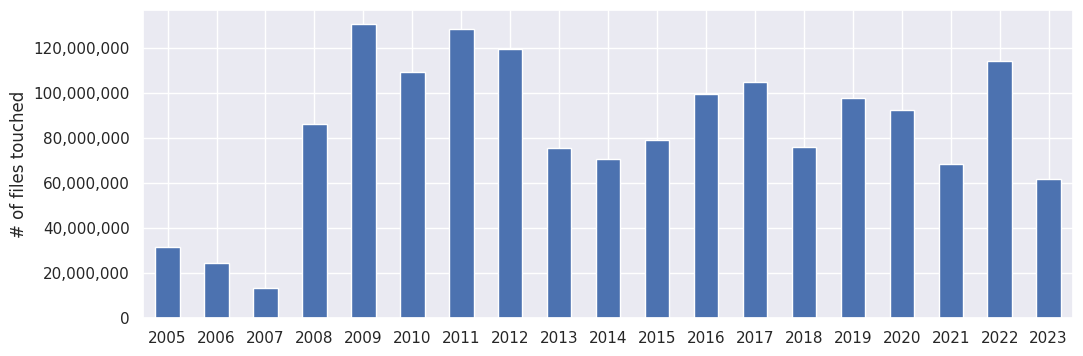

In [178]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["date"].dt.year)['commit_size'].sum().plot(kind='bar', rot=0, ax=axs)
plt.ylabel("# of files touched") 
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("");

## Number of files modified per year

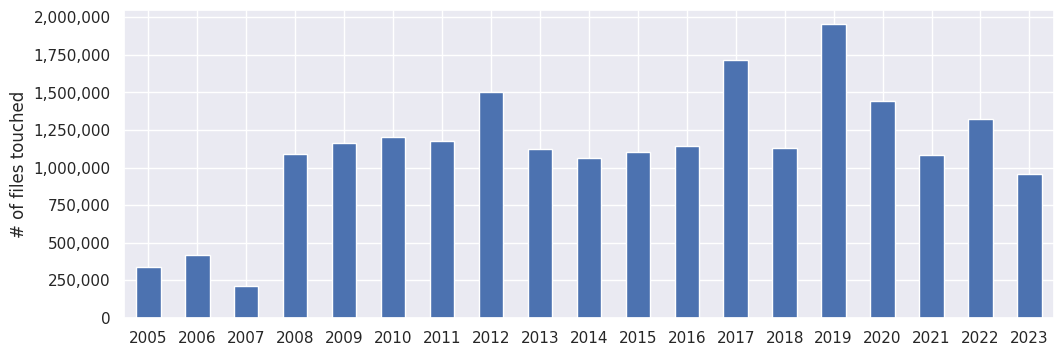

In [177]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["date"].dt.year)['number_of_files'].sum().plot(kind='bar', rot=0, ax=axs)
axs.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel("# of files touched") 
plt.xlabel("");

## Number of files and lines modified per year

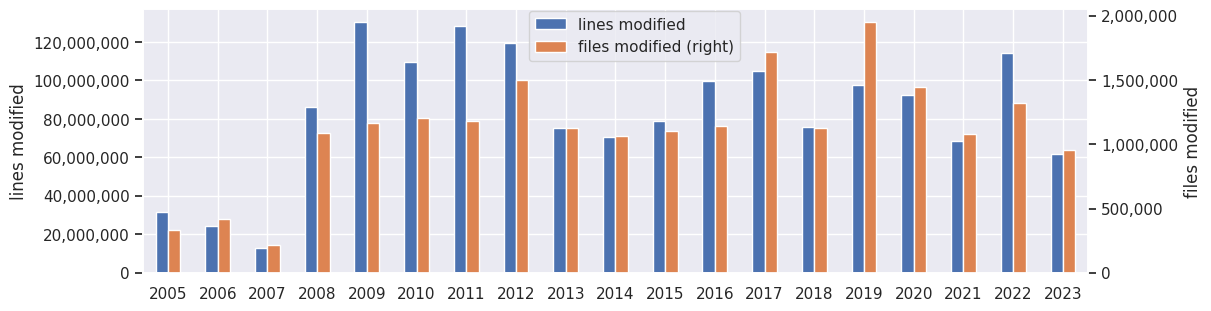

In [176]:
fig, ax = plt.subplots(figsize=(12, 3), layout="constrained")
df.groupby(df["date"].dt.year)[['commit_size', 'number_of_files']].sum().plot.bar(secondary_y="number_of_files", rot=0, ax=ax, xlabel='')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)

# 
ax.set_ylabel('lines modified')
ax.right_ax.set_ylabel('files modified')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.right_ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Leyend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
ax.legend(h1+h2,['lines modified']+['files modified (right)'], loc='center', bbox_to_anchor=(0.52, 0.90))
plt.xlabel("")
plt.savefig('modifiedPerYear.pdf');

## Number of unique committers per year

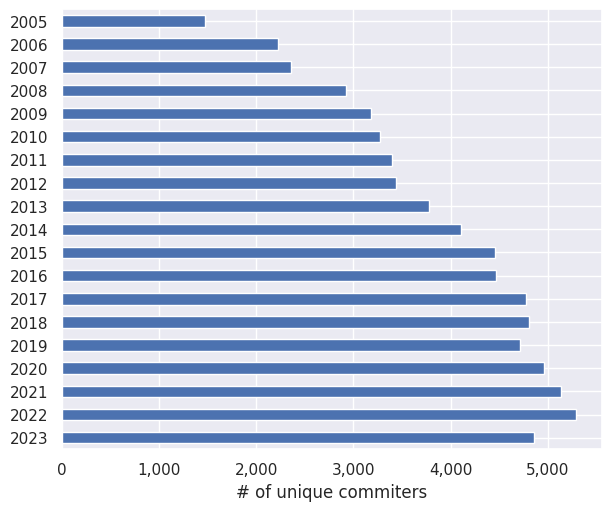

In [174]:
fig, axs = plt.subplots(figsize=(6, 5), layout="constrained")
df.groupby(df["date"].dt.year)['author'].nunique().plot.barh(ax=axs).invert_yaxis()
axs.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("# of unique commiters") 
plt.ylabel("")
plt.savefig('authorsPerYear.pdf');